## Time Series EDA
- single continuous variable over (uniformly distributed) time
- identify trend and seasonality

### Setup
°F = (K - 273.15) x 1.8000 + 32.00

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
# reading in data from csv, changing index to date column, sorting by date
df = pd.read_csv('sa_temps.csv', index_col='datetime', parse_dates=True).sort_index()

# converting temperature type to Fahrenheit
df.temp = (df.temp - 273.15) * 1.8 + 32

# printing date range and df shape
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

# previewing data
df.head(10)

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
2012-10-01 18:00:00,61.327473
2012-10-01 19:00:00,61.390200
2012-10-01 20:00:00,61.452926
2012-10-01 21:00:00,61.515652


- seasonality: a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality
- trend: long term upwards or downwards movement
- cycle: Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons

### Data Splitting
- Ideally all splits contain a season
- Human-based
- Percentage based
- Cross Validation

### Percentage-Based

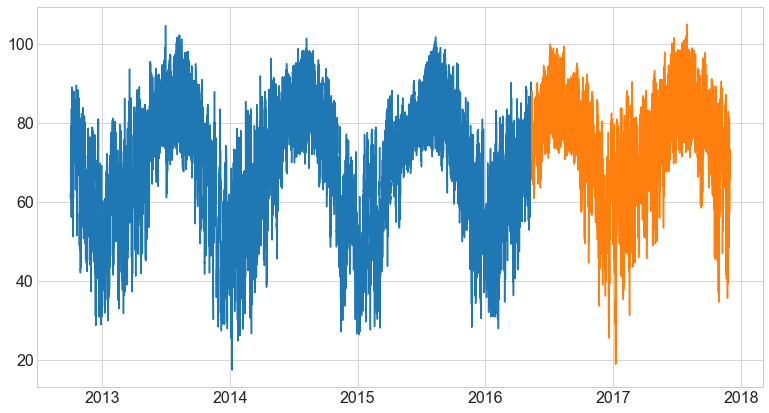

In [5]:
# calculating number of rows train data set should have
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

# setting number of rows for train and test
train = df[:test_start_index] 
test = df[test_start_index:] 

# plotting data to confirm that where train data date ends, test data date begins
# this tells us our split was succesful 
plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

### Human-Based

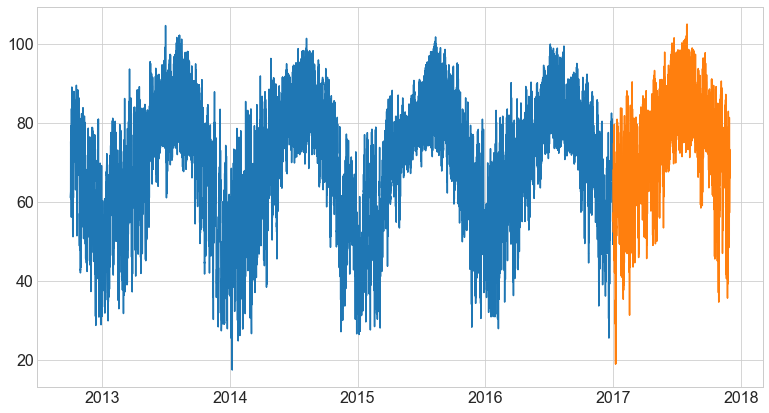

In [6]:
# setting train to all 2016 data and test to all 2017 data
train = df[:'2016'] 
test = df['2017']

# using visual to confirm split was successful
plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

In [7]:
# observing train values
train

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
...,...
2016-12-31 19:00:00,63.230000
2016-12-31 20:00:00,68.216000
2016-12-31 21:00:00,70.664000


### Visualizations

In [9]:
# setting y to target variable, temp
y = train.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

### Don't consider the time series

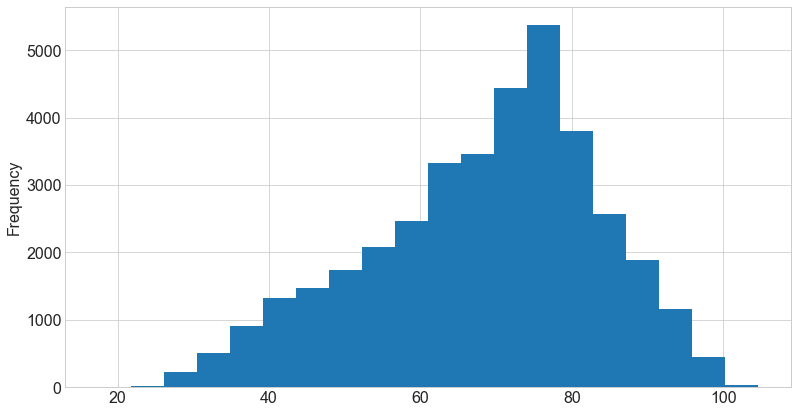

In [10]:
# plotting target variable
y.plot.hist(bins=20)

- by month
- by weekday

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


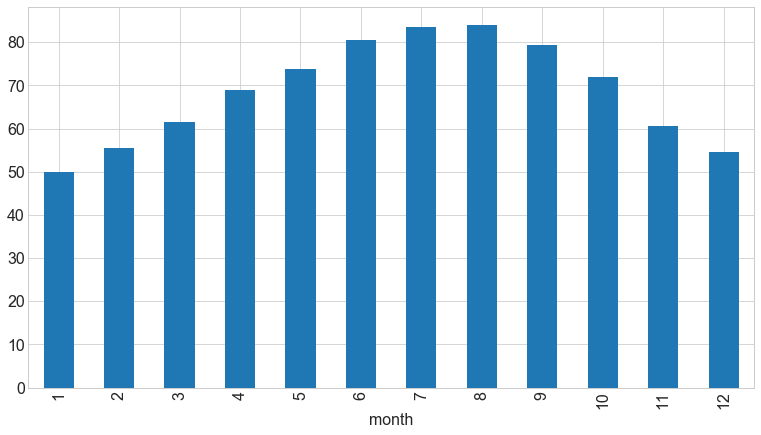

In [11]:
# creating month column
train['month'] = train.index.month

# grouping by month and plotting
train.groupby('month').temp.mean().plot.bar()

In [12]:
# creating weekday column
train['weekday'] = train.index.day_name()
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,temp,month,weekday
datetime,,,
2012-10-01 13:00:00,61.052000,10,Monday
2012-10-01 14:00:00,61.076568,10,Monday
2012-10-01 15:00:00,61.139294,10,Monday
2012-10-01 16:00:00,61.202020,10,Monday
2012-10-01 17:00:00,61.264747,10,Monday


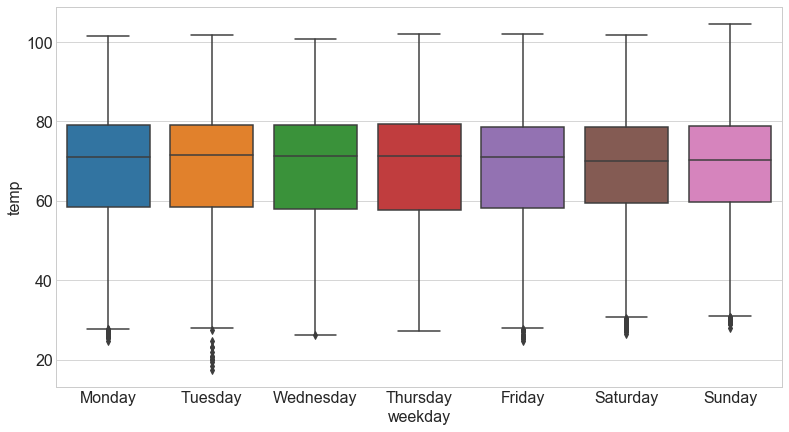

In [13]:
# creating box plot of temperature by weekday
sns.boxplot(data=train, y='temp', x='weekday')

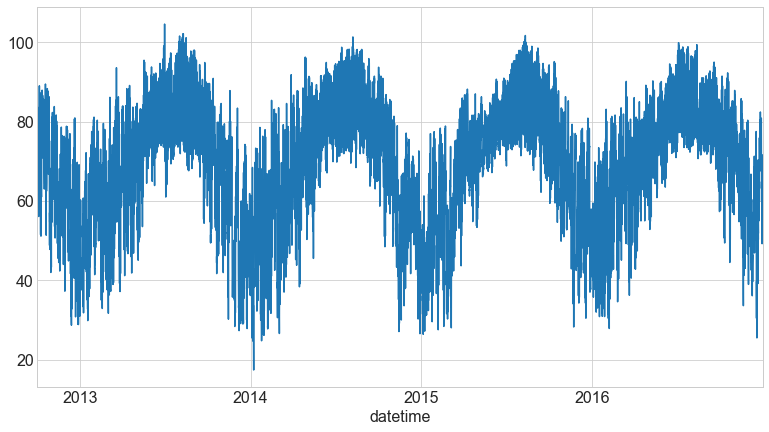

In [14]:
# visualizing target variable over time
y.plot()

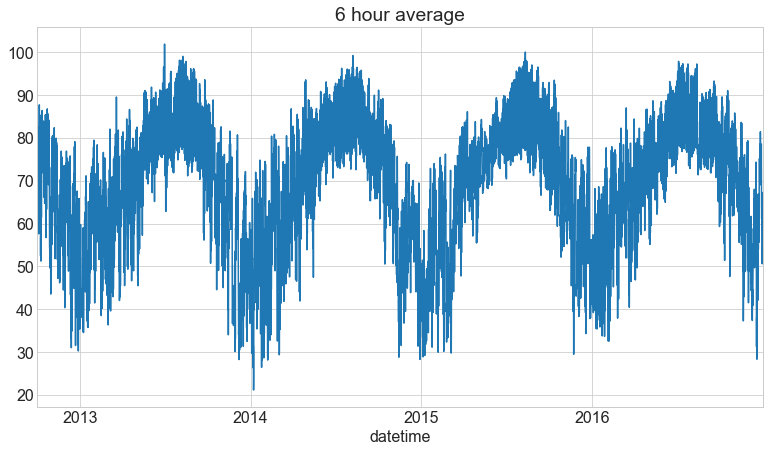

In [15]:
# visualizing target variable as 6 hour averages
y.resample('6H').mean().plot(title='6 hour average')

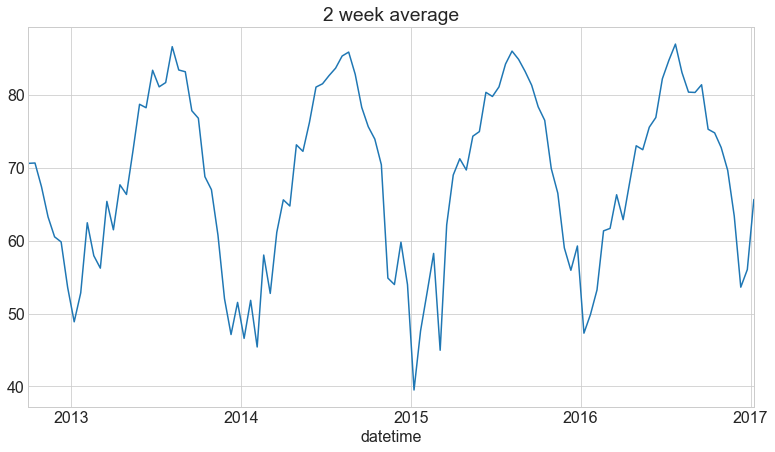

In [16]:
# visualizing target as 2 week average
y.resample('2W').mean().plot(title='2 week average')

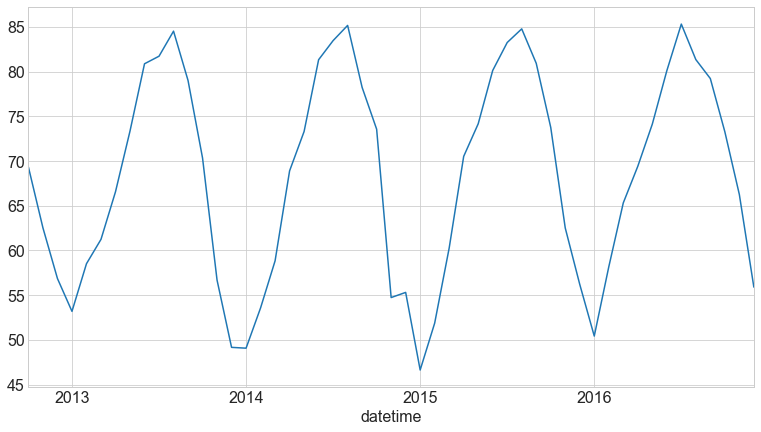

In [17]:
# visualizing target as monthly average
y.resample('M').mean().plot()

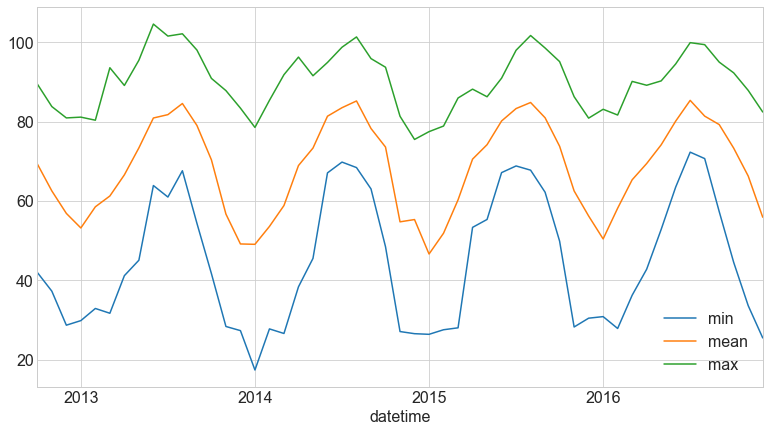

In [18]:
# plotting min, max and average of target variable per month
y.resample('M').agg(['min', 'mean', 'max']).plot()

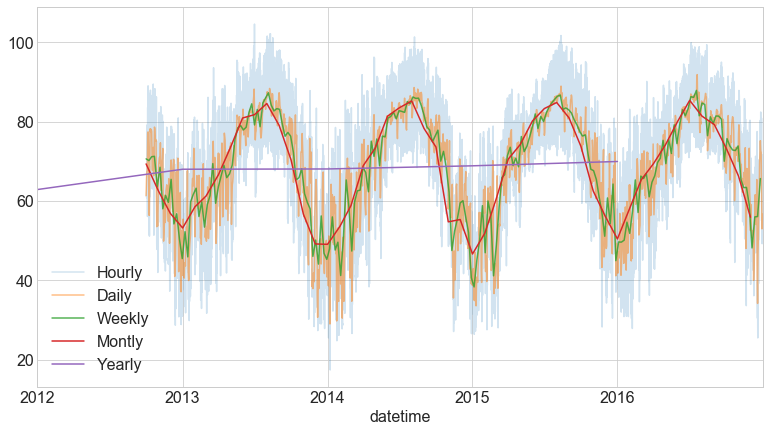

In [19]:
# visualizing target variable's daily, weekly, monthly, and yearly average
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

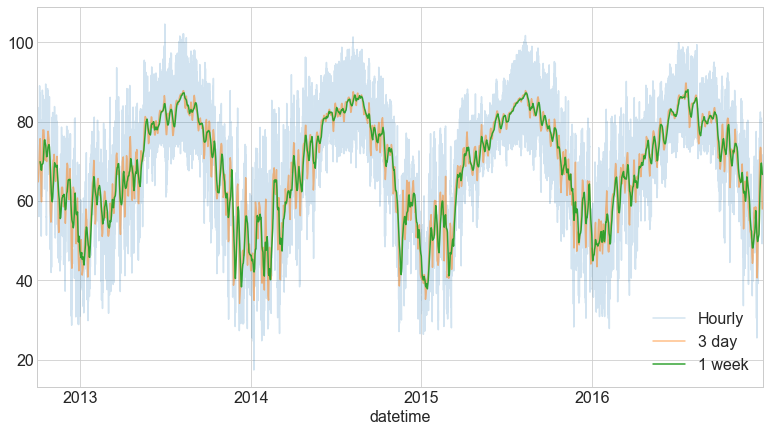

In [21]:
# visualizing target as hourly, 3 day rolling and 1 week rolling average
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

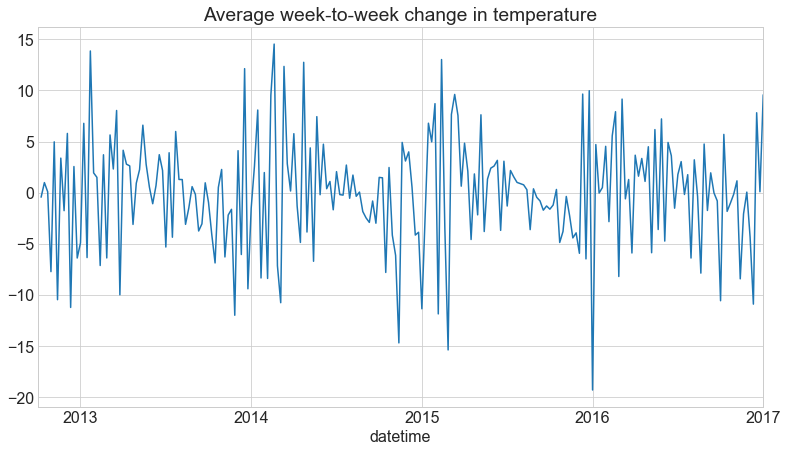

In [22]:
# plotting week to week change in temp
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature')

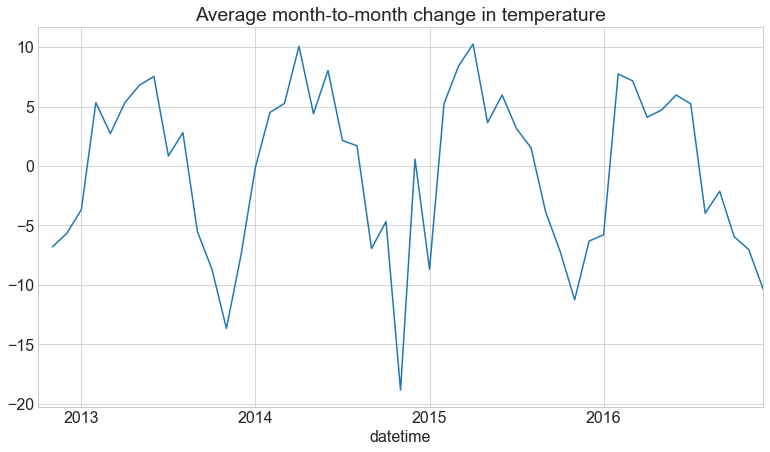

In [23]:
# plotting average month to month change in temp
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature')

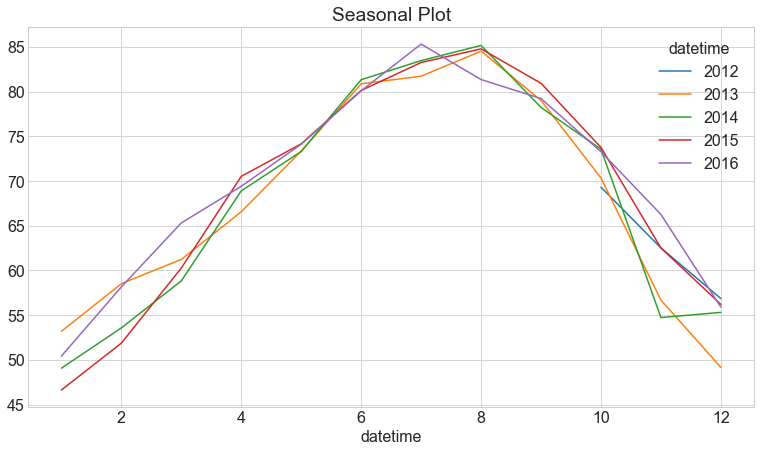

In [24]:
# creating seasonal plot to show change in target variable throughout each year
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

# all years have very similar shapes

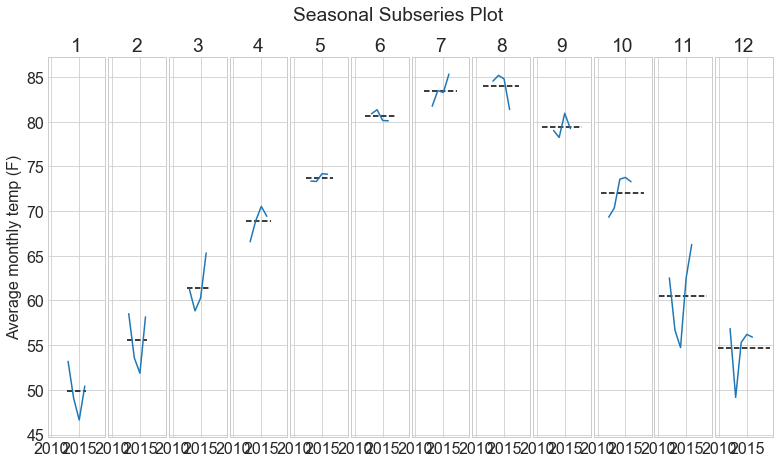

In [25]:
# creating groupby to create seasonal subseries plot
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')

axs[0].set(ylabel='Average monthly temp (F)')
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=.05)

Text(0.5, 1.0, 'Lag plot with lag=1')

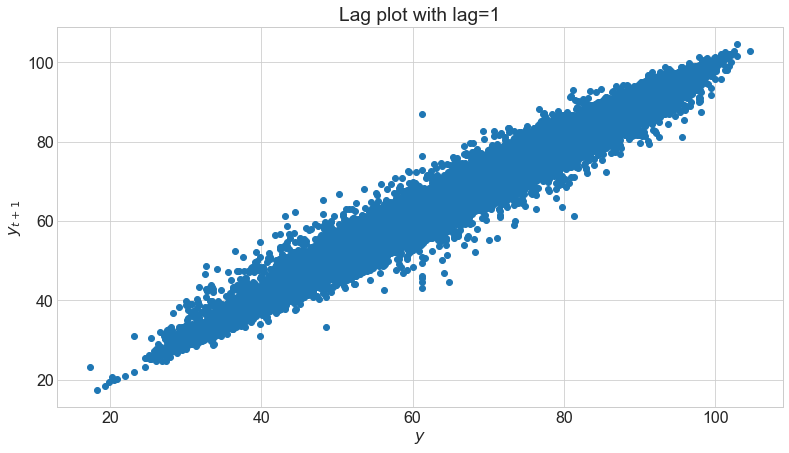

In [26]:
# creating lag plot of target variable
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[Text(0, 0.5, 't + 1'), Text(0.5, 0, 't')]

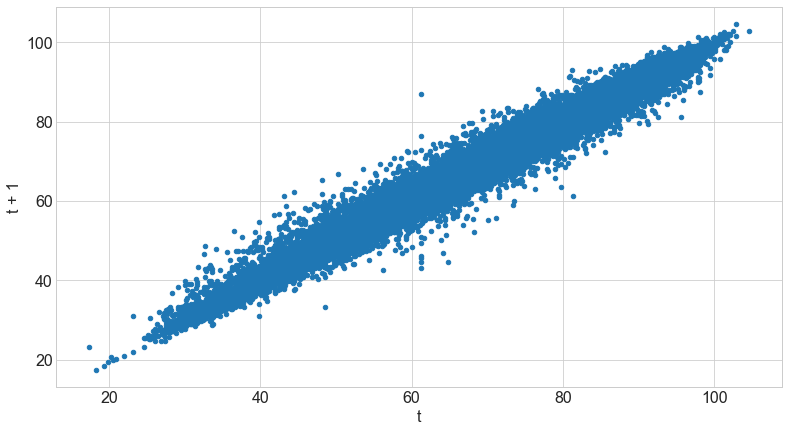

In [27]:
train['y(t + 1)'] = train.temp.shift(-1)
ax = train.plot.scatter(x='temp', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [28]:
# deleting unwanted columns
del train['y(t + 1)']
del train['month']

,this_week,the_next_week
datetime,,
2012-10-07,70.595201,70.152821
2012-10-14,70.152821,71.138375
2012-10-21,71.138375,71.230464
2012-10-28,71.230464,63.510554
2012-11-04,63.510554,68.482625
...,...,...
2016-12-04,59.062094,48.163625
2016-12-11,48.163625,55.979132
2016-12-18,55.979132,56.073143


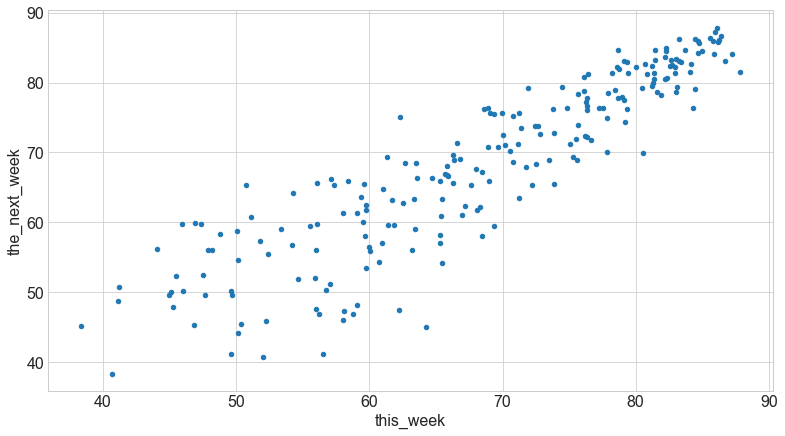

In [29]:
# creating scatterplot where data points represent temperatures, x is current date and y is 1 week from that date
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.temp.shift(-1)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,this_week,12_weeks_out
datetime,,
2012-10-07,70.595201,50.376741
2012-10-14,70.152821,45.473616
2012-10-21,71.138375,52.252877
2012-10-28,71.230464,45.907936
2012-11-04,63.510554,59.763739
...,...,...
2016-12-04,59.062094,NaN
2016-12-11,48.163625,NaN
2016-12-18,55.979132,NaN


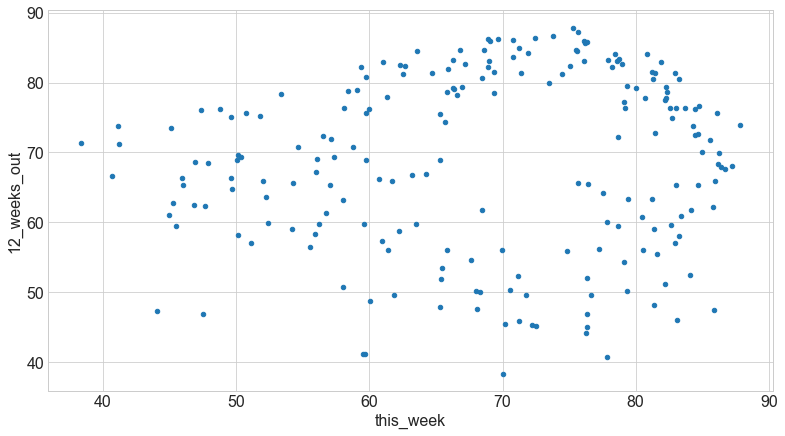

In [30]:
# same idea as before but the y axis is now 12 ahead of the x axis date
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.temp.shift(-12)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,half_a_year_later
datetime,,
2012-10-07,70.595201,63.558611
2012-10-14,70.152821,66.345532
2012-10-21,71.138375,68.965502
2012-10-28,71.230464,65.862071
2012-11-04,63.510554,66.797107
...,...,...
2016-12-04,59.062094,NaN
2016-12-11,48.163625,NaN
2016-12-18,55.979132,NaN


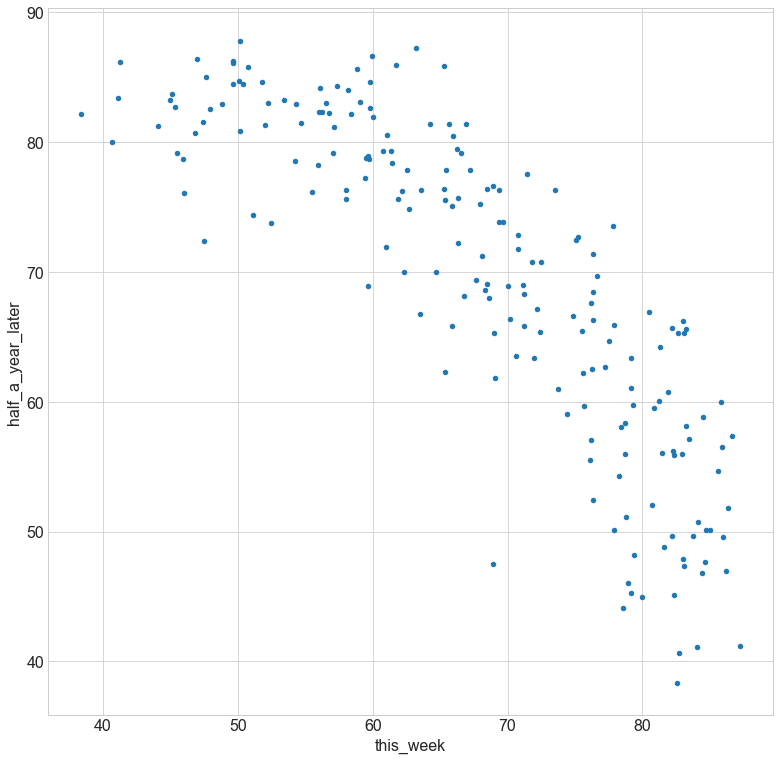

In [31]:
# same idea again, but y axis is now roughly 6 months ahead
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.temp.shift(-26)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

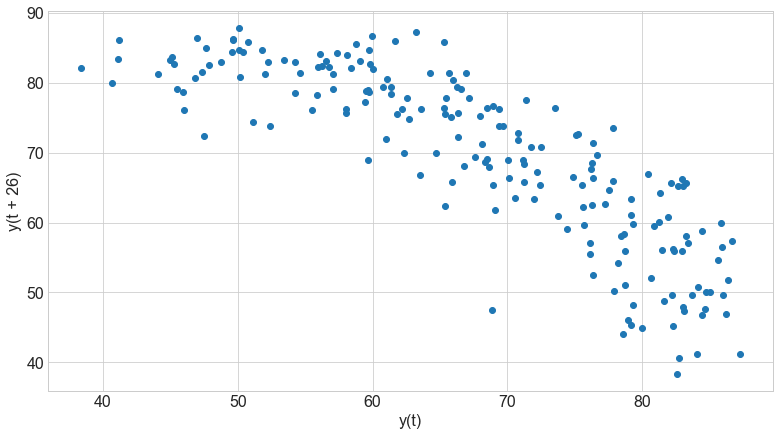

In [32]:
# creating alternate lag plot
pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=26)

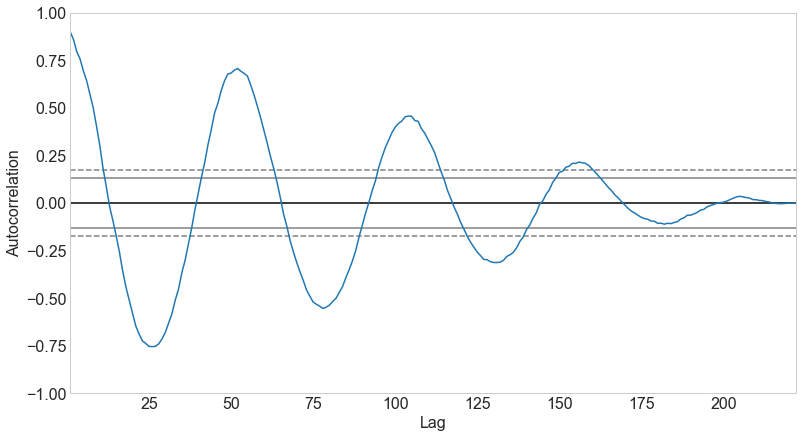

In [33]:
# creating autocorrelation plot
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())

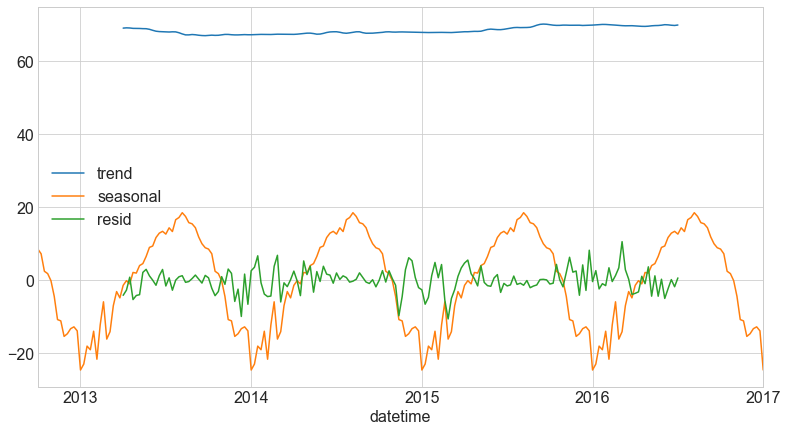

In [34]:
# visualizing season decomposition
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

decomposition.iloc[:, 1:].plot()

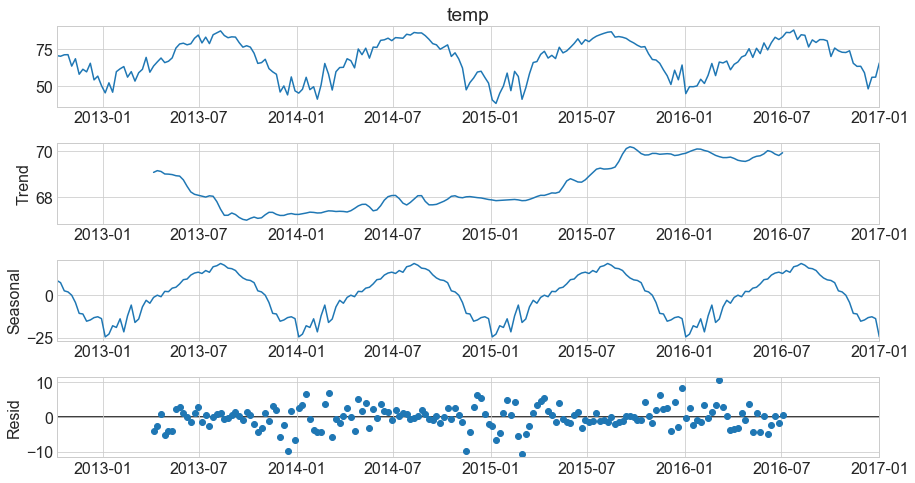

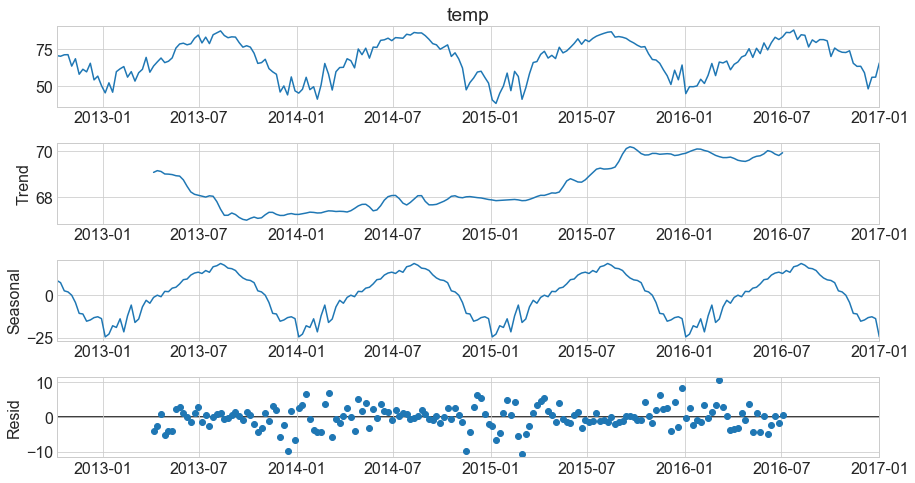

In [36]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()

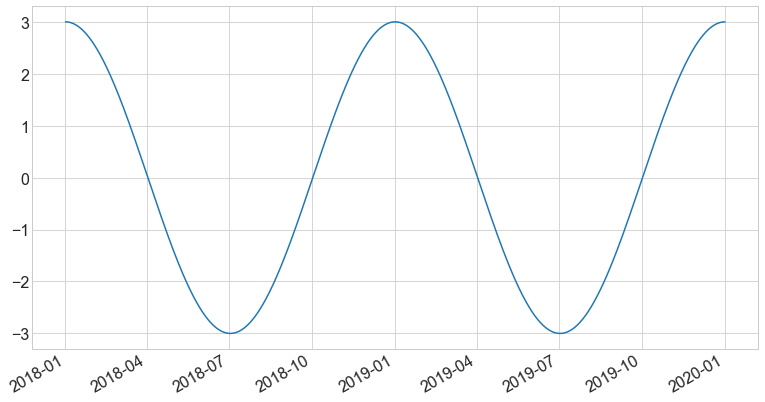

In [37]:
# seasonal decomposition with fake data
idx = pd.date_range('2018', '2020', 365 * 2)
S = 3 * np.cos(np.linspace(0, 4 * np.pi, 365 * 2))
S = pd.Series(S, index=idx)
S.plot()

(-3, 3)

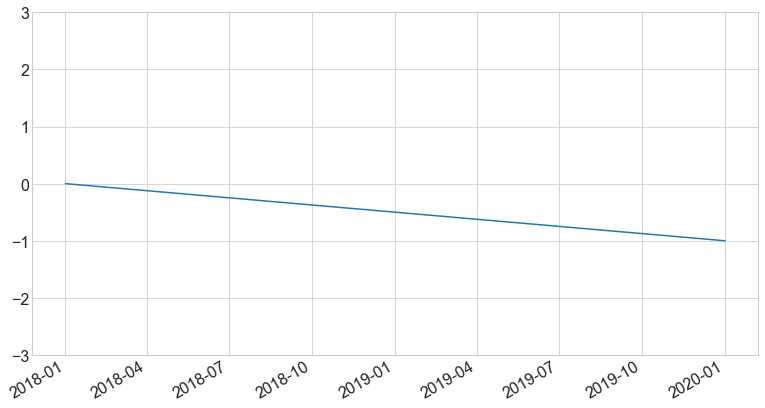

In [38]:
T = np.linspace(0, -1, 365 * 2)
T = pd.Series(T, index=idx)
T.plot()
plt.ylim(-3, 3)

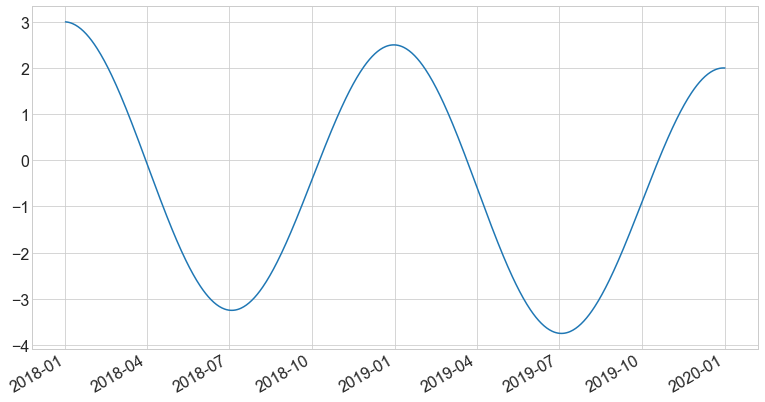

In [39]:
(S + T).plot()

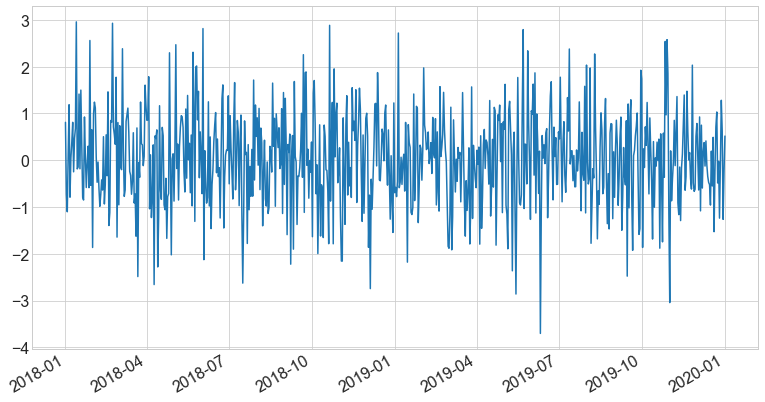

In [40]:
E = np.random.randn(365 * 2)
E = pd.Series(E, index=idx)
E.plot()

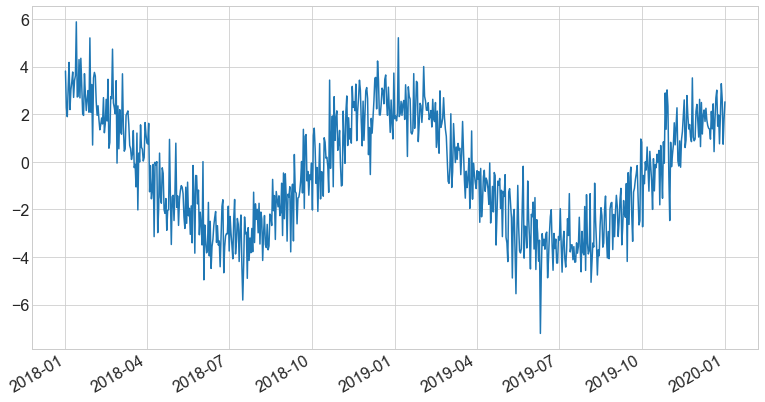

In [41]:
(S + T + E).plot()

In [42]:
# categories over time
train = train.resample('D').mean()
# create a categorical feature
train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').mean()

,temp
temp_bin,
cold,49.381699
cool,65.200219
warm,75.447977
hot,83.449087


In [43]:
# sampling 12 rows from train
train.sample(12)

,temp,temp_bin
datetime,,
2014-02-04,47.148500,cold
2012-12-12,40.967750,cold
2012-11-26,54.846875,cold
2016-01-25,59.850259,cool
2013-09-16,78.660194,warm
2016-06-20,80.990750,hot
2016-04-12,70.885096,warm
2015-03-15,64.266463,cool
2016-12-15,54.067250,cold


Text(0, 0.5, '% of days in the month')

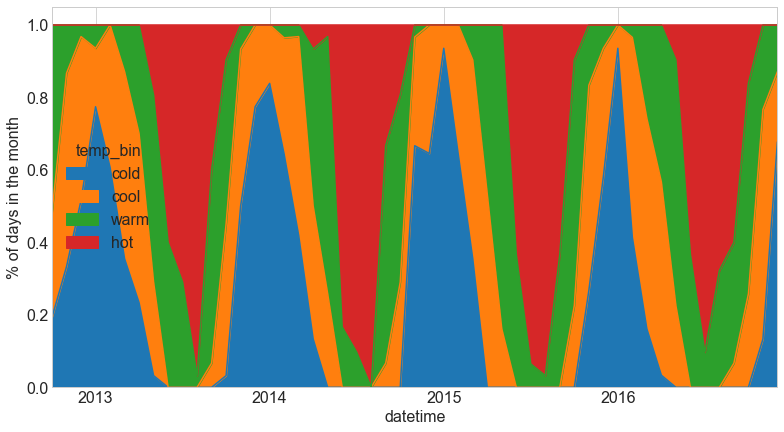

In [44]:
# visualizing temperature as a binned feature
(train.groupby('temp_bin')
 .resample('M')
 .size() # like COUNT(*)
 .unstack(0) # turns an index level into columns
 .fillna(0)
 .astype(int)
 .apply(lambda row: row / row.sum(), axis=1) # raw nums to % of the row
 .plot.area()
)
plt.ylabel('% of days in the month')

Text(0, 0.5, '% of days in the month')

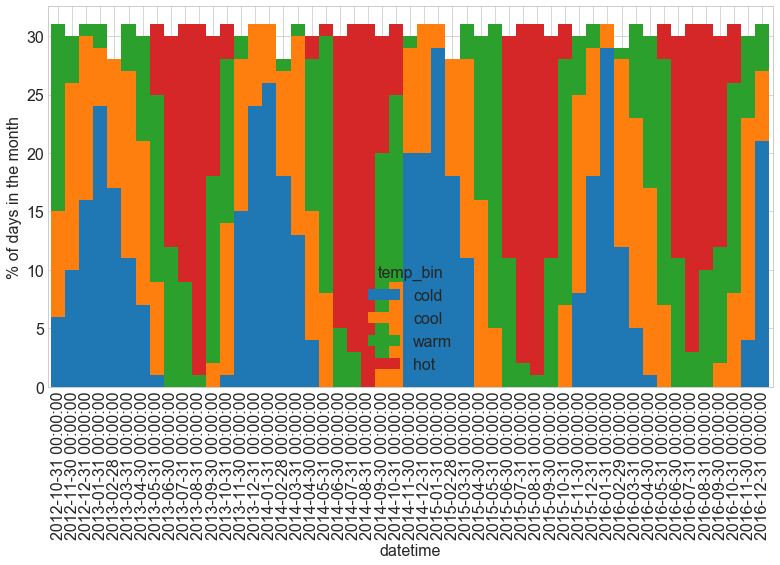

In [45]:
(train.groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .fillna(0)
 .astype(int)
 .plot.bar(stacked=True, width=1)
)
plt.ylabel('% of days in the month')

[Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December'),
 Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December')]

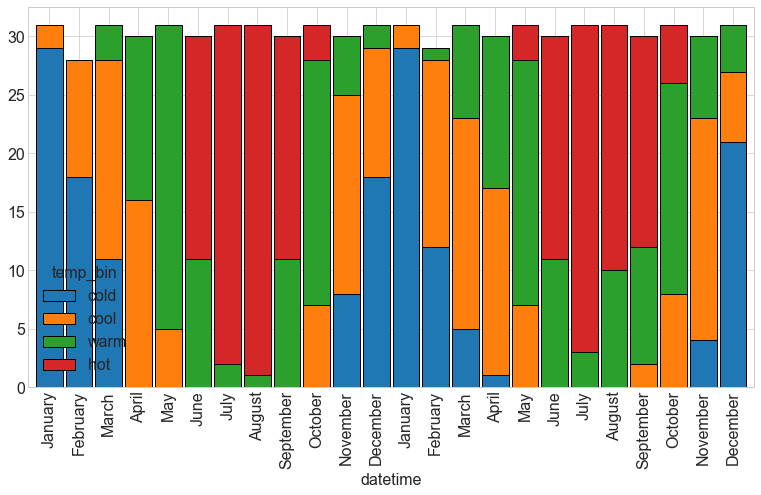

In [46]:
ax = (train['2015':'2016']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
# take the existing labels, convert them to Timestamps, and then reformat with .strftime
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

## strftime

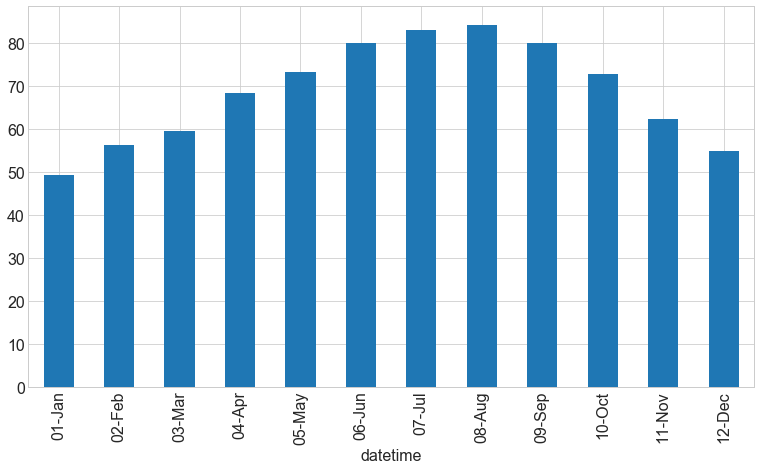

In [47]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()

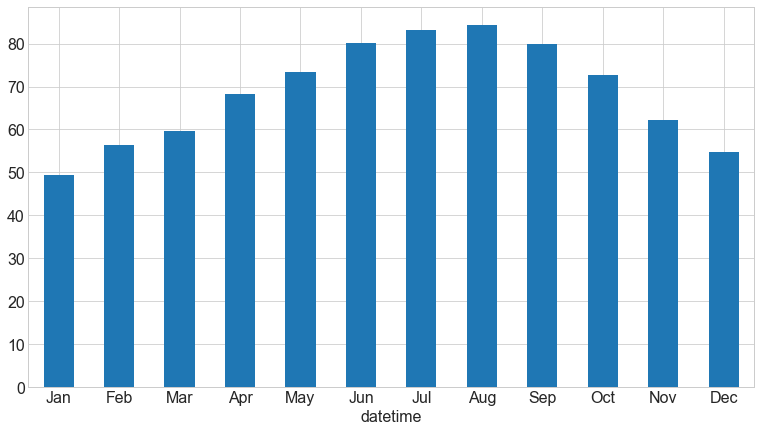

In [48]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

## Matplotlib Dates
This will only work with plt.plot or ax.plot, not with the pandas plotting!

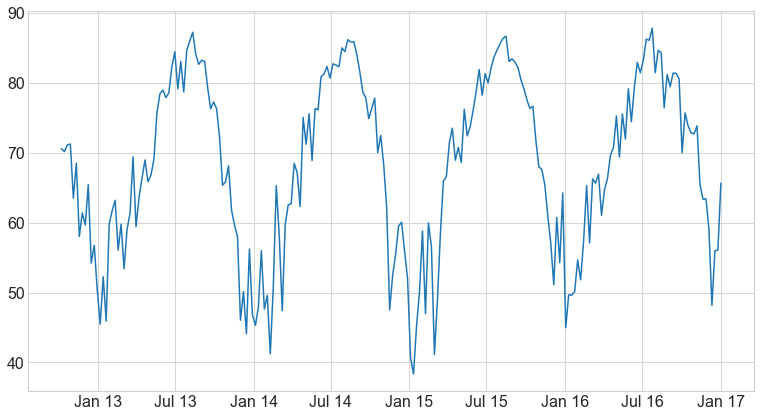

In [49]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

## Extra lessons

- Lag plot hue by month
- Distribution of temp bin by month for all years

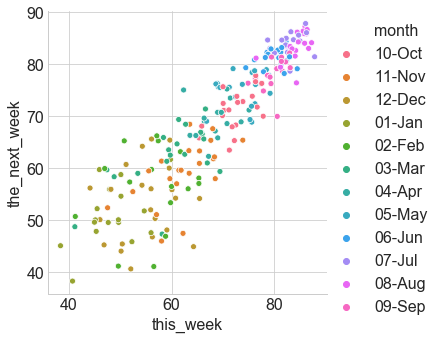

In [52]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.temp.shift(-1)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly['month'] = weekly.index.strftime('%m-%b')
sns.relplot(data=weekly, y='the_next_week', x='this_week', hue='month')

[Text(0, 0.5, '% of days in the month'),
 Text(0.5, 1.0, 'Distribution of temp_bin overall years')]

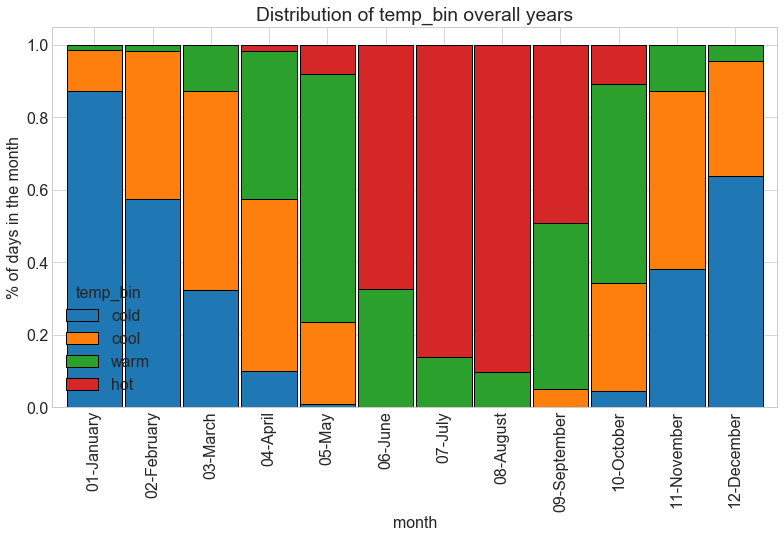

In [53]:
train['month'] = train.index.strftime('%m-%B')
ax = (train.groupby(['month', 'temp_bin'])
 .size()
 .unstack(-1)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.bar(stacked=True, width=.95, ec='black')
)
ax.set(
    title='Distribution of temp_bin overall years',
    ylabel='% of days in the month',
)